In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def print_precision_recall(labels, preds):
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))
    print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))
    print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))
    print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import funzioni as fz
def print_cm(labels, preds):
    classes = ['Noise', 'Signal']
    cm=confusion_matrix(labels, preds)
    fz.plot_confusion_matrix(cm,target_names=classes, normalize=False,)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import uproot4
import tensorflow as tf
keras = tf.keras
from tensorflow.keras.layers import Conv1D, Activation, GlobalAveragePooling1D, MaxPooling1D, AveragePooling1D, Dropout, Dense, Lambda, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from livelossplot import PlotLossesKerasTF
def rescale_hist(scaled_positive):
    count=0
    index=151
    limit=5
    plt.figure(figsize=[20,8])
    for item in scaled_positive.classnames():
        hist=scaled_positive[item]
        X_scaled=hist.to_numpy()[1]
        y_scaled=hist.to_numpy()[0]
        plt.subplot(index)
        plt.plot(X_scaled[:-1],y_scaled)
        print('len y ', len(y_scaled))
        index+=1
        count+=1
        if count==limit: break

    list_of_hist = []
    for item in scaled_positive.classnames():
        y_scaled=scaled_positive[item].to_numpy()[0]
        list_of_hist.append(y_scaled[0:769])

    scaled_positive=pd.DataFrame(list_of_hist, index=None)

    scaler2 = preprocessing.MinMaxScaler()
    scaled_positive = pd.DataFrame(data = scaler2.fit_transform(scaled_positive.values.T).T, columns = scaled_positive.columns)
    count=0
    index=151
    limit=5
    plt.figure(figsize=[20,8])
    for isto in range(0,2000):
        plt.subplot(index)
        plt.plot(scaled_positive.loc[isto])
        index+=1
        count+=1
        if count==limit: break
    return scaled_positive
def build_improved_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', kernel_initializer='uniform',input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,kernel_initializer='uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = keras.optimizers.SGD(lr=0.3, momentum=0.9)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

def train_and_test(model):
    if model is None:
        model=build_improved_model()
        plotlosses = PlotLossesKerasTF()
        early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
        model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

        history = model.fit(train_set.values, train_labels.values, batch_size = 100, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)
        model = keras.models.load_model("script_checkpoint.h5")
    
        pred_labels = model.predict(test_set.values)
        pred_labels = (pred_labels > 0.5)
        print_cm(test_labels.values,pred_labels)

    pred_labels = model.predict(scaled_positive.values)
    pred_labels = (pred_labels > 0.5)
    print_precision_recall(scaled_labels,pred_labels)
    print_cm(scaled_labels,pred_labels)
    return model

In [2]:
hists=pd.read_pickle('histograms.pkl')

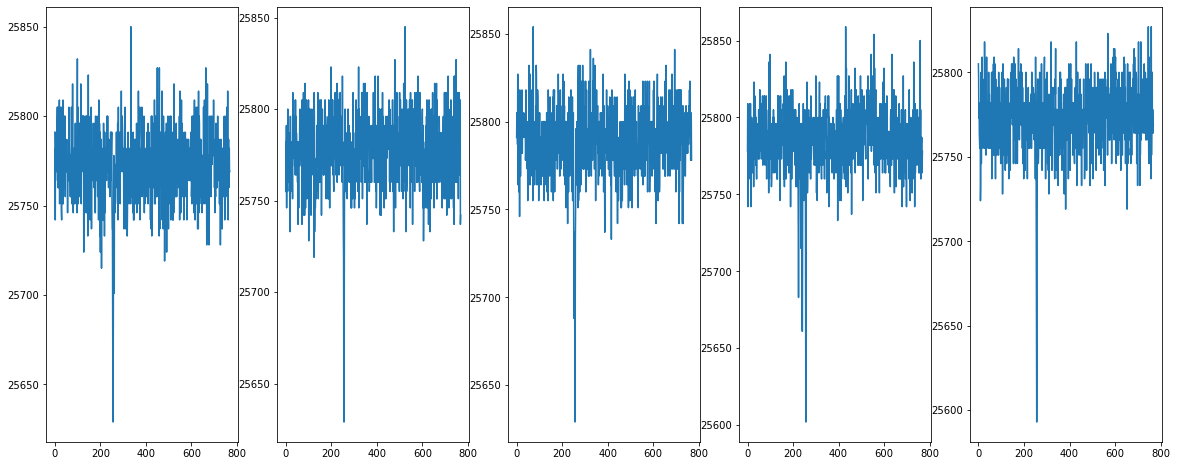

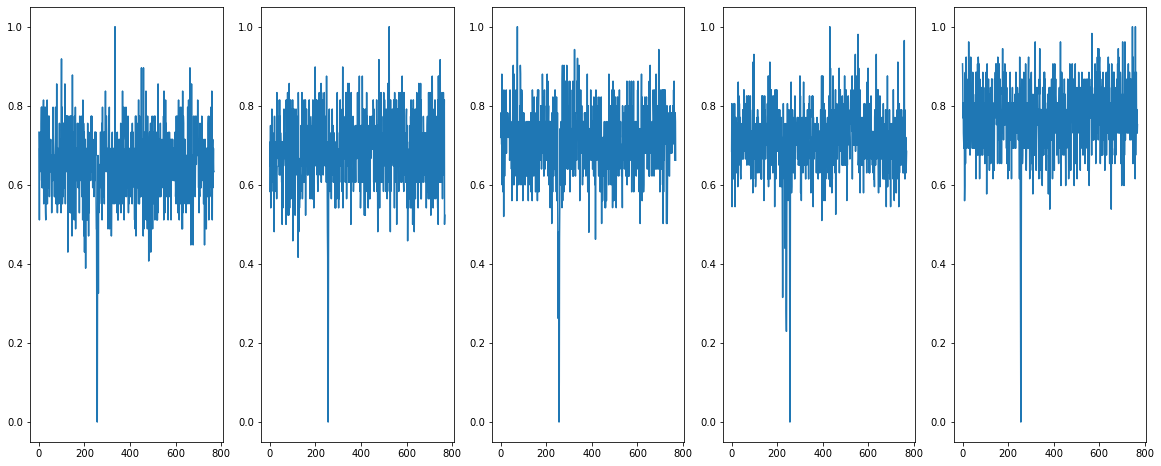

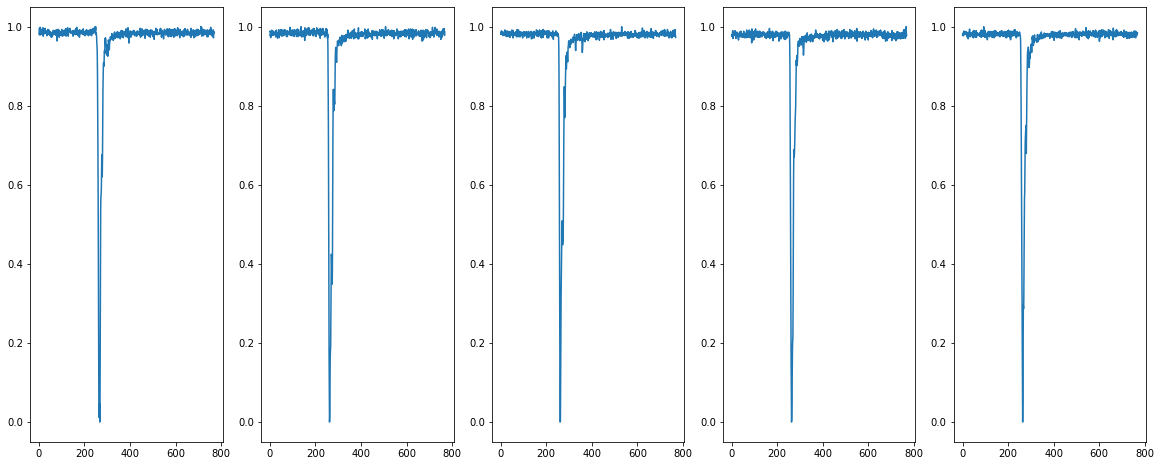

In [3]:
X=hists.iloc[:,0:769]
y=hists.iloc[:,769]
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break
scaler1 = preprocessing.MinMaxScaler()
X = pd.DataFrame(data = scaler1.fit_transform(X.values.T).T, columns = X.columns)
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 1):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break
X_copy=X.copy()
y_copy=y.copy()

In [4]:
#drop positivi
for isto in range(0,2149):
    if (y[isto] == 1):
        X.drop([isto], inplace=True)
        y.drop([isto], inplace=True)

len y  822
len y  807
len y  872
len y  829
len y  817


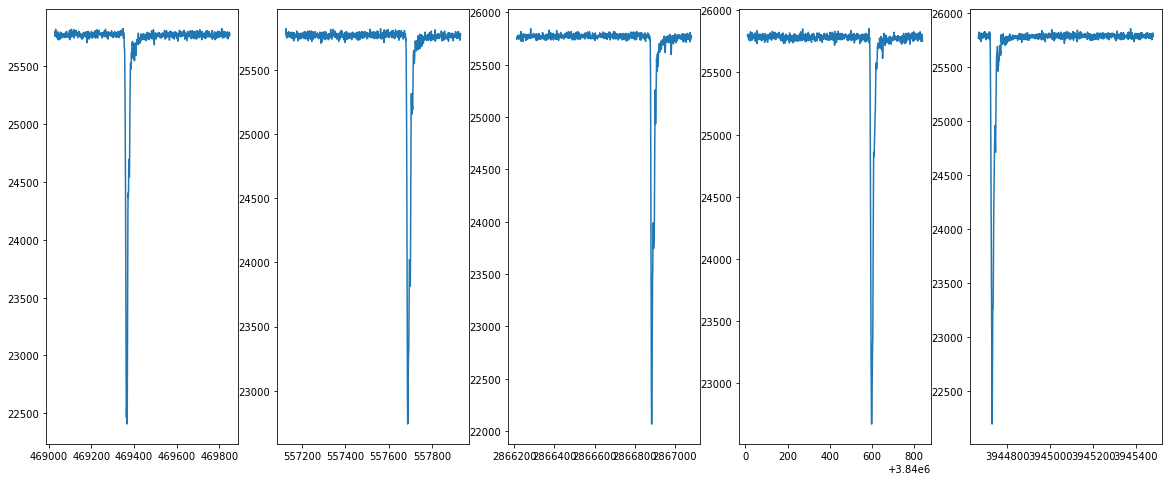

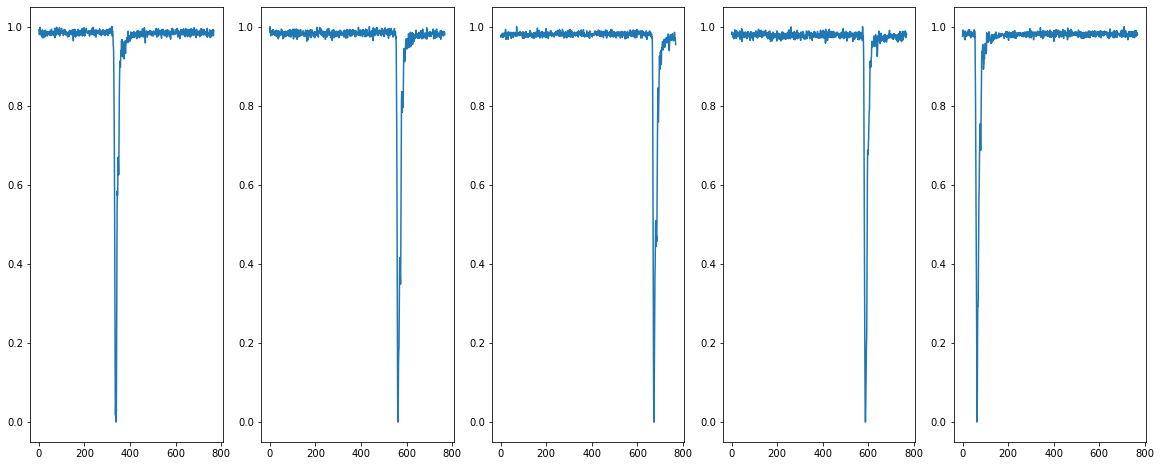

In [5]:
scaled_positive = uproot4.open("positivi_shifted_100.root")
scaled_positive = rescale_hist(scaled_positive)

In [6]:
positive_labels=pd.Series(np.ones(len(scaled_positive)))

In [7]:
#append positivi shiftati ai negativi
y=y.append(positive_labels)
X=X.append(scaled_positive)

In [8]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size = 0.10, random_state = 42, shuffle=True,stratify=y)
train_set, val_set, train_labels, val_labels = train_test_split(train_set, train_labels, test_size = 0.20, random_state = 42, stratify = train_labels)

### training sui positivi shiftati e test su quelli in posizione fissa

In [9]:
scaled_positive=X_copy.copy()
scaled_labels=y_copy.copy()

In [10]:
#drop negativi
for isto in range(0,2149):
    if (scaled_labels[isto] == 0):
        scaled_positive.drop([isto], inplace=True)
        scaled_labels.drop([isto], inplace=True)

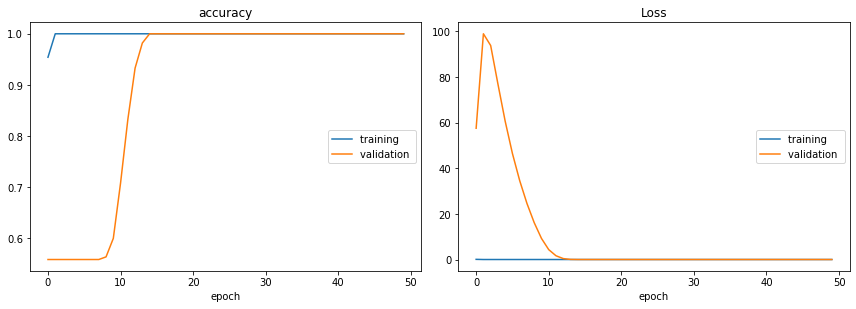

accuracy
	training         	 (min:    0.954, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.071, cur:    0.000)
	validation       	 (min:    0.000, max:   98.863, cur:    0.000)
1547/1547 [==============================] - 1s 344us/sample - loss: 1.2866e-14 - accuracy: 1.0000 - val_loss: 4.7425e-19 - val_accuracy: 1.0000


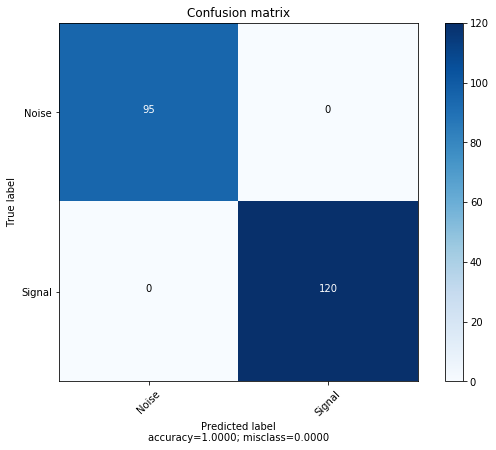


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


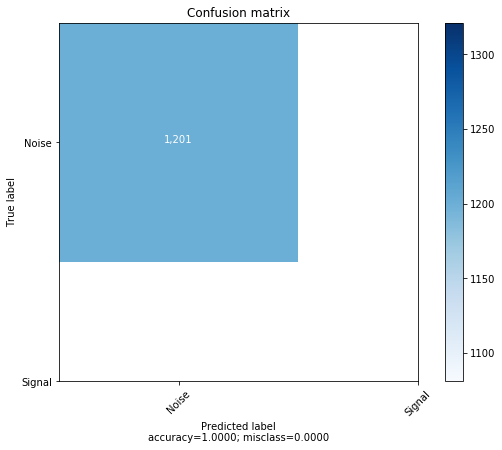

In [11]:
model=None
model=train_and_test(model)

### shifted 25

len y  822
len y  807
len y  872
len y  829
len y  817


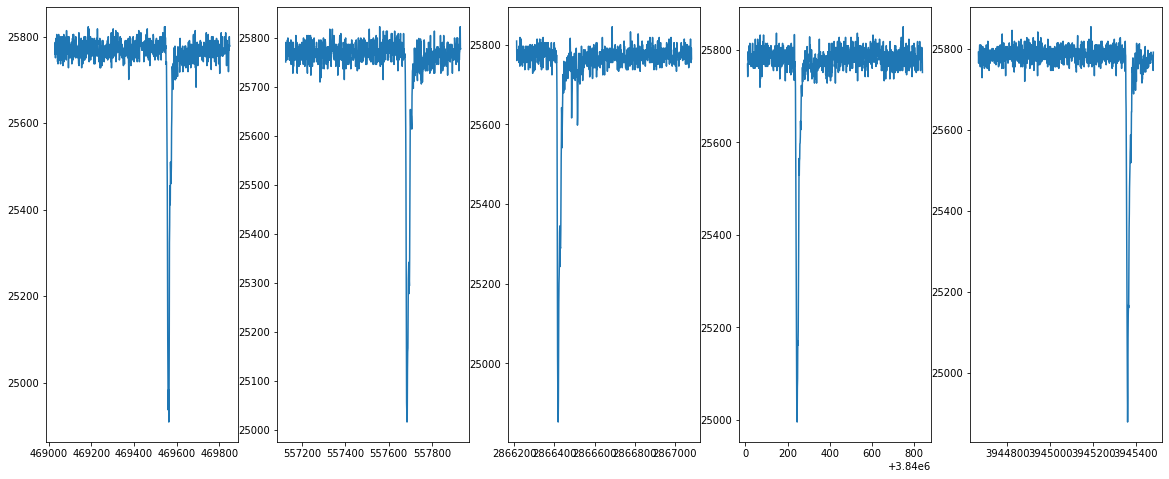

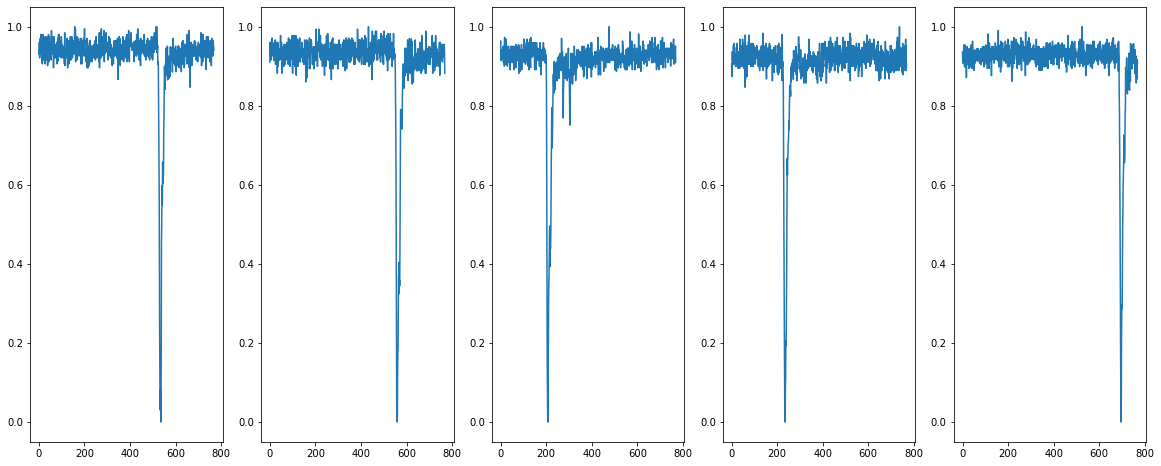

In [12]:
scaled_positive = uproot4.open("positivi_shifted_25.root")
scaled_positive = rescale_hist(scaled_positive)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 0.50
Macro Recall: 0.50
Macro F1-score: 0.50

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


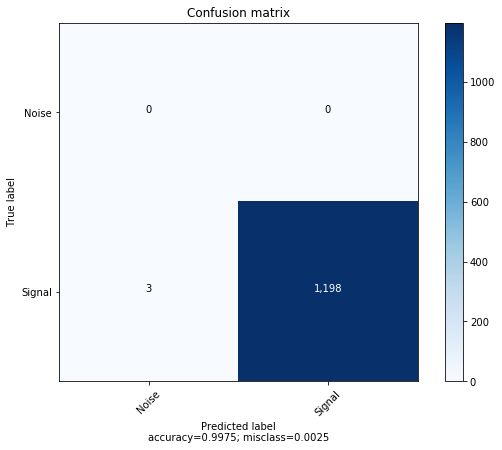

In [15]:
train_and_test(model)

### NOT shifted 25

len y  822
len y  807
len y  872
len y  829
len y  817


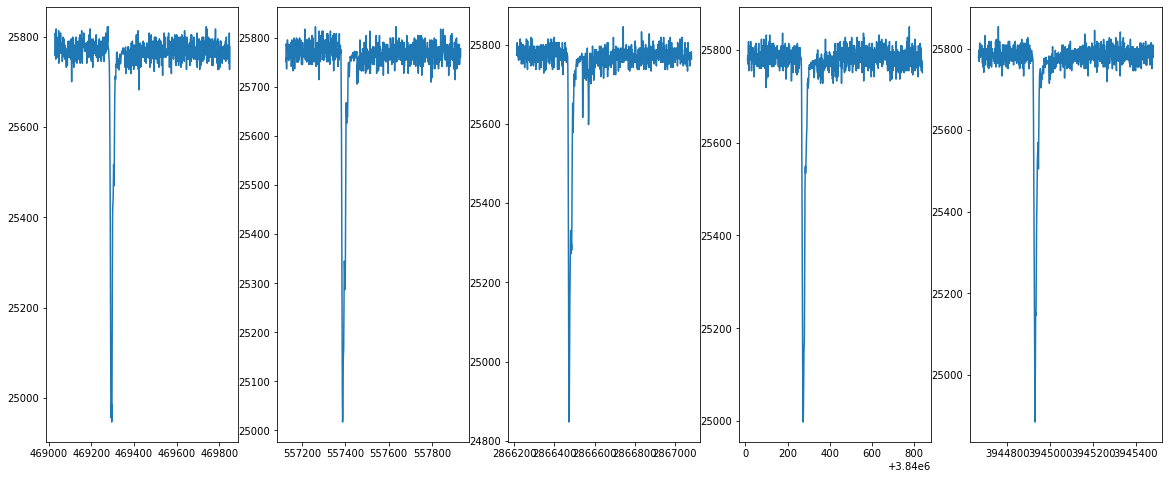

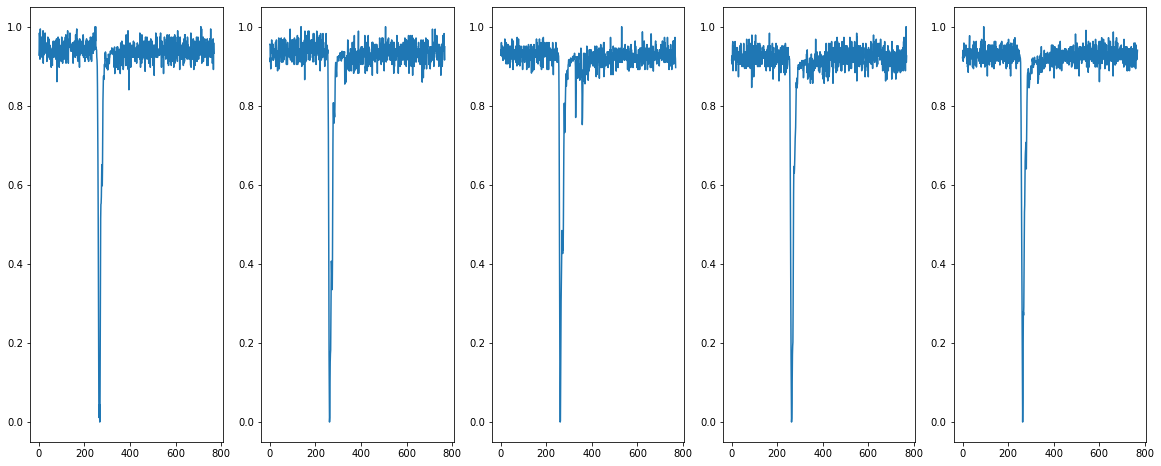

In [16]:
scaled_positive = uproot4.open("positivi_scalati.root")
scaled_positive = rescale_hist(scaled_positive)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


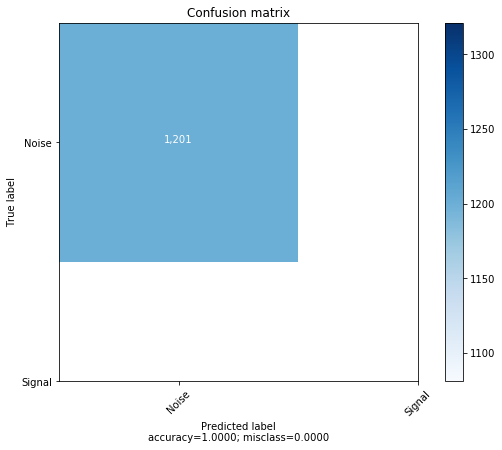

In [18]:
train_and_test(model)

### shifted 10

len y  822
len y  807
len y  872
len y  829
len y  817


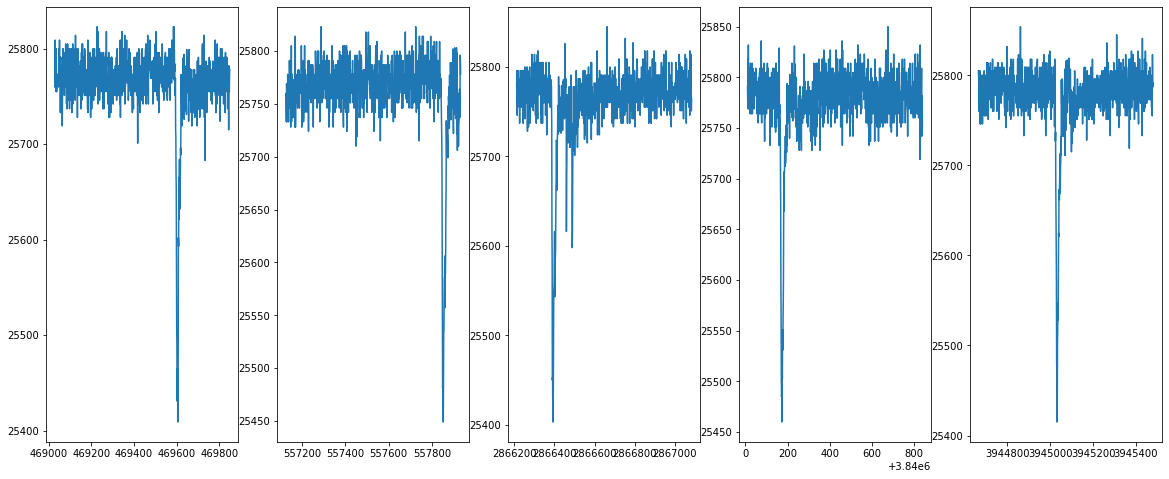

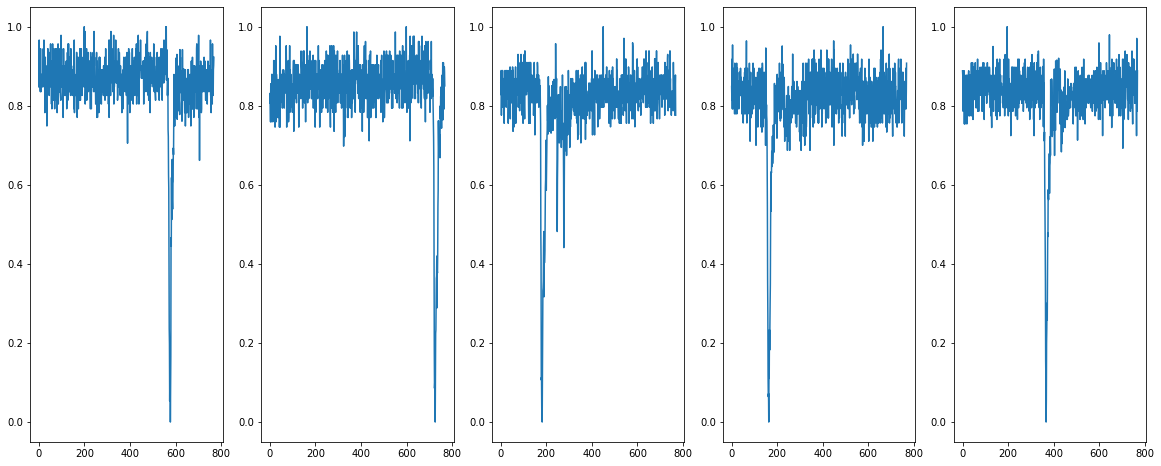

In [19]:
scaled_positive = uproot4.open("positivi_shifted_10.root")
scaled_positive = rescale_hist(scaled_positive)


Accuracy: 0.12

Micro Precision: 0.12
Micro Recall: 0.12
Micro F1-score: 0.12

Macro Precision: 0.50
Macro Recall: 0.06
Macro F1-score: 0.11

Weighted Precision: 1.00
Weighted Recall: 0.12
Weighted F1-score: 0.21


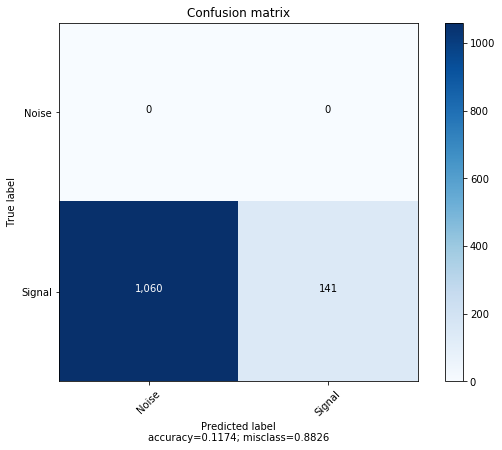

In [21]:
train_and_test(model)

### NOT shifted 10

len y  822
len y  807
len y  872
len y  829
len y  817


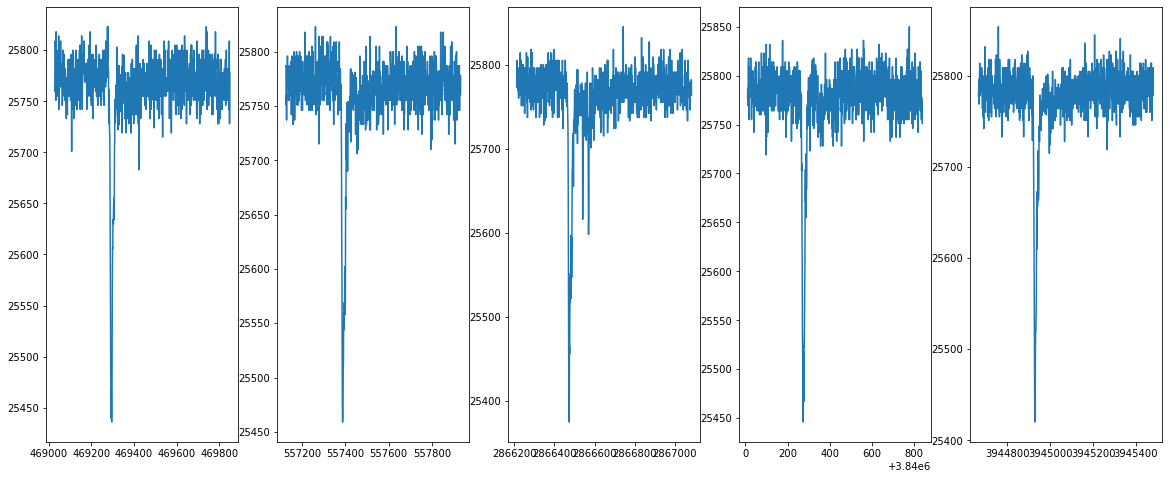

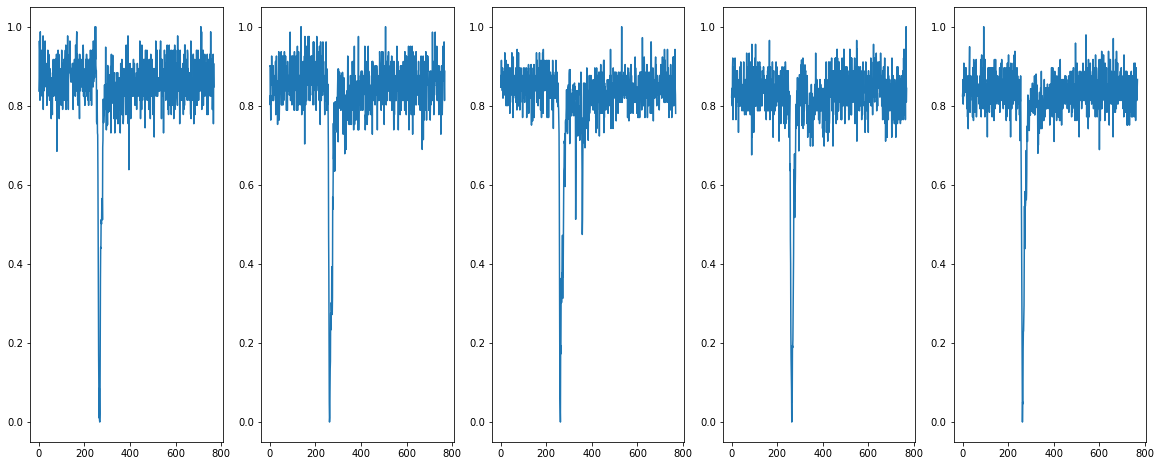

In [22]:
scaled_positive = uproot4.open("positivi_scalati2.root")
scaled_positive = rescale_hist(scaled_positive)


Accuracy: 0.15

Micro Precision: 0.15
Micro Recall: 0.15
Micro F1-score: 0.15

Macro Precision: 0.50
Macro Recall: 0.07
Macro F1-score: 0.13

Weighted Precision: 1.00
Weighted Recall: 0.15
Weighted F1-score: 0.26


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


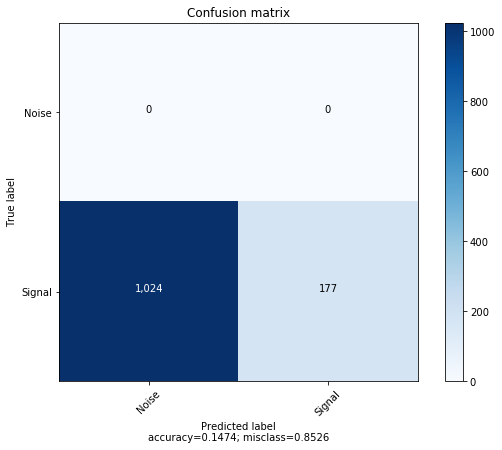

In [23]:
train_and_test(model)